In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


data = pd.read_csv("Droop_and_Voltage_Response.csv") 

features = ["PCN1", "PCN2", "PCN3", "PCN4", "PCN5", "L1", "L2", "L3", "L4", "L5"]


targets = ["Droop1", "Droop2", "Droop3", "Droop4", "Droop5"]

X = data[features]
y = data[targets]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


models = {}
results = {}


for target in targets:
    print(f"Training model for {target}...")
    y_train_target = y_train[target]
    y_test_target = y_test[target]


    model = LinearRegression()
    model.fit(X_train, y_train_target)

    models[target] = model


    y_pred = model.predict(X_test)


    mse = mean_squared_error(y_test_target, y_pred)
    r2 = r2_score(y_test_target, y_pred)


    results[target] = {
        "MSE": mse,
        "R^2": r2,
        "Predictions": y_pred,
    }


    print(f"{target} - MSE: {mse:.4f}, R^2: {r2:.4f}")




Training model for Droop1...
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Droop1 - MSE: 0.2517, R^2: 0.2493
Training model for Droop2...
Droop2 - MSE: 0.1002, R^2: -0.1930
Training model for Droop3...
Droop3 - MSE: 0.0327, R^2: 0.4946
Training model for Droop4...
Droop4 - MSE: 0.1717, R^2: 0.2483
Training model for Droop5...
Droop5 - MSE: 0.0607, R^2: 0.0998


Visualizing results for Droop1...
Visualizing results for Droop2...
Visualizing results for Droop3...
Visualizing results for Droop4...
Visualizing results for Droop5...


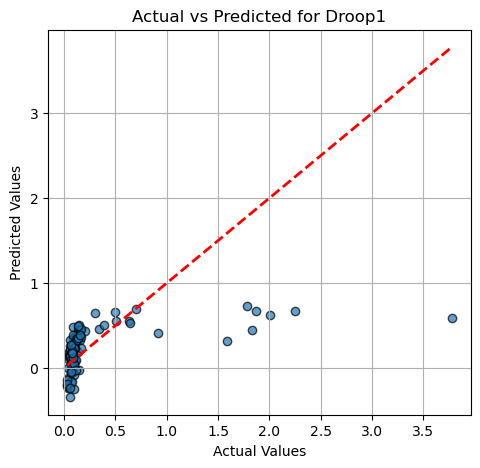

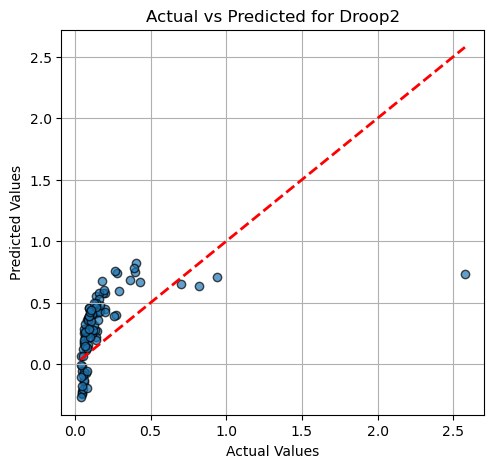

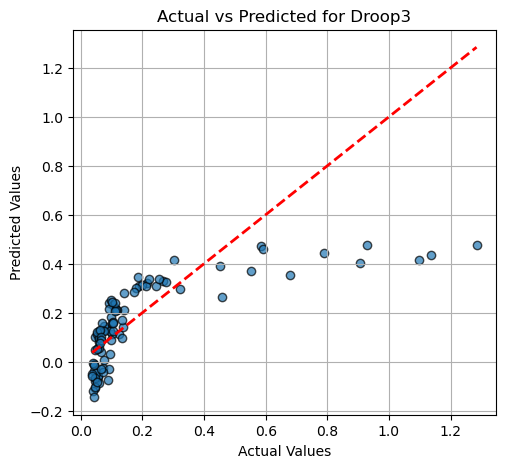

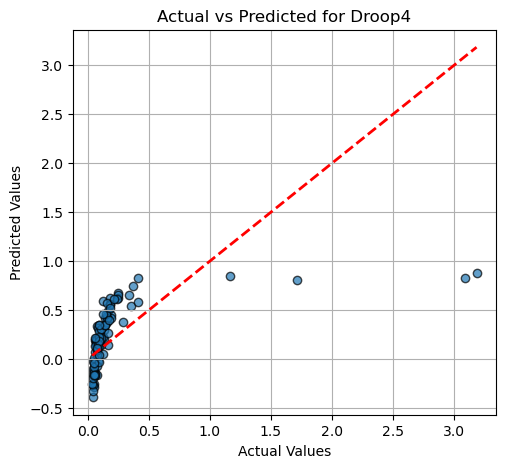

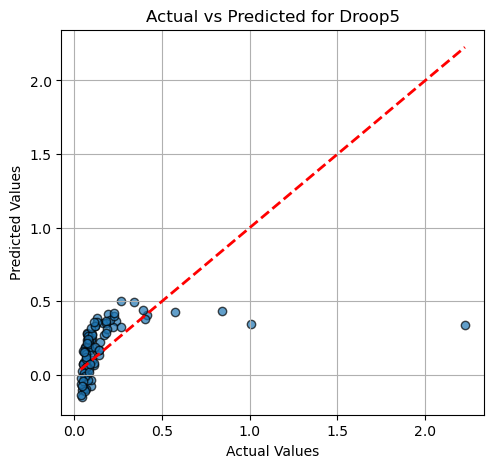

In [10]:
import matplotlib.pyplot as plt

# Visualization for each target (Droop1-Droop5)
for target in targets:
    print(f"Visualizing results for {target}...")
    y_test_target = y_test[target]
    y_pred = results[target]["Predictions"]

   
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(y_test_target, y_pred, alpha=0.7, edgecolor='k')
    plt.plot([y_test_target.min(), y_test_target.max()],
             [y_test_target.min(), y_test_target.max()],
             'r--', lw=2)
    plt.title(f"Actual vs Predicted for {target}")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.grid()

    